In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import torchio as tio
import nibabel as nib
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

DIAMS_PATH = '/radraid2/mvinet/VNet_Lung_Nodule_Segmentation/data/splits/val/diams'
IMAGES_PATH = '/radraid2/mvinet/VNet_Lung_Nodule_Segmentation/data/splits/val/images'
MASKS_PATH = '/radraid2/mvinet/VNet_Lung_Nodule_Segmentation/data/splits/val/masks'
SPRS_PATH = '/radraid2/mvinet/VNet_Lung_Nodule_Segmentation/data/splits/val/sprs'


In [50]:
diams_files = os.listdir(DIAMS_PATH)
images_files = os.listdir(IMAGES_PATH)
masks_files = os.listdir(MASKS_PATH)
sprs_files = os.listdir(SPRS_PATH)

def load_npy(dirpath, idx):
    filepaths:list[str] = os.listdir(dirpath)
    filepaths.sort()
    filepath:str = filepaths[idx]
    return np.load(os.path.join(dirpath, filepath))

image:np.ndarray = load_npy(IMAGES_PATH, 0)
mask:np.ndarray = load_npy(MASKS_PATH, 0)

pos_coords:list[tuple[int, int, int]] = list(zip(*np.where(mask == 1)))
print(len(pos_coords))

335


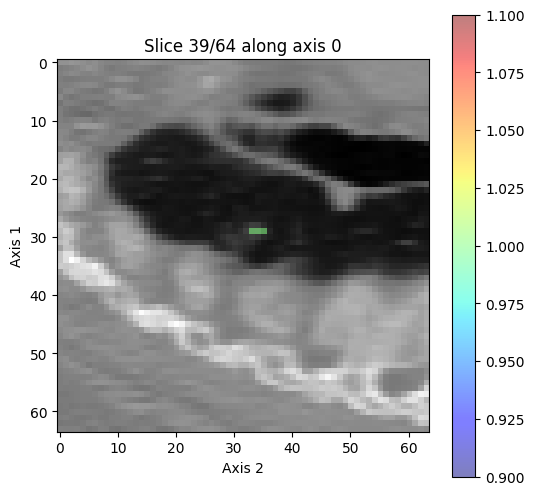

In [62]:
# Display the middle slice along the first axis (e.g., axial view)
# You can change the axis index (0, 1, or 2) to view slices along different planes
axis_to_slice = 0
middle_slice_idx = 39

image_slice = image.take(indices=middle_slice_idx, axis=axis_to_slice)
mask_slice = mask.take(indices=middle_slice_idx, axis=axis_to_slice)
masked_mask = ma.masked_where(mask_slice == 0, mask_slice)

plt.figure(figsize=(6, 6)) # Optional: Adjust figure size
plt.imshow(image_slice, cmap='gray')
plt.imshow(masked_mask, cmap='jet', alpha=0.5)

plt.title(f'Slice {middle_slice_idx}/{image.shape[axis_to_slice]} along axis {axis_to_slice}')
plt.xlabel(f'Axis {(axis_to_slice + 2) % 3}') # Adjust axis labels based on slice axis
plt.ylabel(f'Axis {(axis_to_slice + 1) % 3}')
plt.colorbar()
plt.show()